In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

cwd = os.getcwd()
print(cwd)
if cwd[-7:] != "Lab_2":
    os.chdir("/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2")
# find and open the flat FITS files that were exposed for 30% saturation and store them all in one list
dark_20s_prefix = "lab2_science_dark_20s.000000"
dark_20s_end = ".DARK.FIT"
dark_20s_data = []
for i in range(7, 17, 1):
    if i < 10:
        filename = dark_20s_prefix + '0' + str(i) + dark_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        dark_20s_data.append(image_data)
    else:
        filename = dark_20s_prefix + str(i) + dark_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        dark_20s_data.append(image_data)

dark_30s_prefix = "lab2_science_dark_30s.0000000"
dark_30s_end = ".DARK.FIT"
dark_30s_data = []
for i in range(0, 10):
    filename = dark_30s_prefix + str(i) + dark_30s_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    dark_30s_data.append(image_data)
    
print(repr(fits.open("images/lab2_science_red_30s.00000202.FIT")[0].header))
# 2024-02-08T04:29:23.846
# 2024-02-08T06:23:25.336
# 2024-02-08T08:30:11.629

/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2
SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 3                        
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
BSCALE  = +1.000000000000E+000                                                  
BZERO   = +3.276800000000E+004                                                  
BIAS    =                  100                                                  
FOCALLEN= +0.000000000000E+000                                                  
APTAREA = +0.000000000000E+000                                                  
APTDIA  = +0.000000000000E+000                                                  
OBSERVER= 'Anja       

In [46]:
median_dark_20s_values = []
dark_20s_values = [dark_20s_data[x] for x in range(0,len(dark_20s_data))]
# print(values)
median_dark_20s_values.append(np.median(dark_20s_values, axis=0))
median_dark_20s_values = median_dark_20s_values[0]

median_dark_30s_values = []
dark_30s_values = [dark_30s_data[x] for x in range(0,len(dark_30s_data))]
# print(values)
median_dark_30s_values.append(np.median(dark_30s_values, axis=0))
median_dark_30s_values = median_dark_30s_values[0]

In [47]:
flat_red_prefix = "lab2_flat_point_three_red.0000000"
flat_red_end = ".FIT"
flat_red_data = []
for i in range(0, 10):
    filename = flat_red_prefix + str(i) + flat_red_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    flat_red_data.append(image_data)

In [48]:
from scipy import stats

median_flat_red_values = []
flat_values = [flat_red_data[x] for x in range(0,len(flat_red_data))]
# print(values)
median_flat_red_values.append(np.median(flat_values, axis=0))
median_flat_red_values = median_flat_red_values[0]

flatten_flat_red = median_flat_red_values.flatten()
median = np.median(flatten_flat_red)
norm_flat_red = median_flat_red_values / median
flatten_norm_flat_red = norm_flat_red.flatten()

mean = np.mean(flatten_norm_flat_red)
std = stats.tstd(flatten_norm_flat_red)

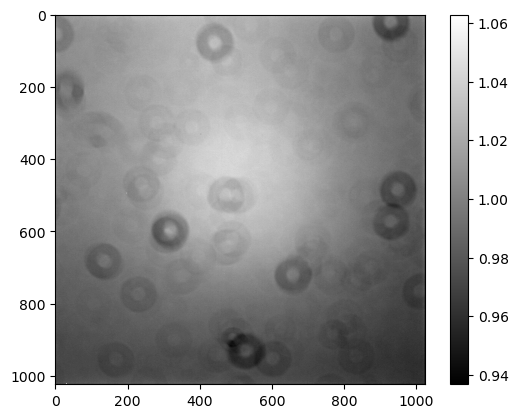

In [49]:
plt.imshow(norm_flat_red, cmap='gray', vmin = mean-3*std, vmax=mean+3*std)
plt.colorbar()

In [50]:
red_20s_prefix = "lab2_science_red_20s.00000"
red_20s_end = ".FIT"
red_20s_data = []
for i in range(0, 248):
    if i == 19 or i == 83 or i == 143 or i == 206:
        continue
    if i < 10:
        filename = red_20s_prefix + "00" + str(i) + red_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_20s_data.append(image_data)
    elif i<100:
        filename = red_20s_prefix + "0" + str(i) + red_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_20s_data.append(image_data)
    else:
        filename = red_20s_prefix + str(i) + red_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_20s_data.append(image_data)
        
red_30s_prefix = "lab2_science_red_30s.00000"
red_30s_end = ".FIT"
red_30s_data = []
for i in range(0, 203):
    if i == 29 or i==69 or i == 73 or i == 109 or i == 123 or i == 165:
        continue
    if i < 10:
        filename = red_30s_prefix + "00" + str(i) + red_30s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_30s_data.append(image_data)
    elif i<100:
        filename = red_30s_prefix + "0" + str(i) + red_30s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_30s_data.append(image_data)
    else:
        filename = red_30s_prefix + str(i) + red_30s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_30s_data.append(image_data)

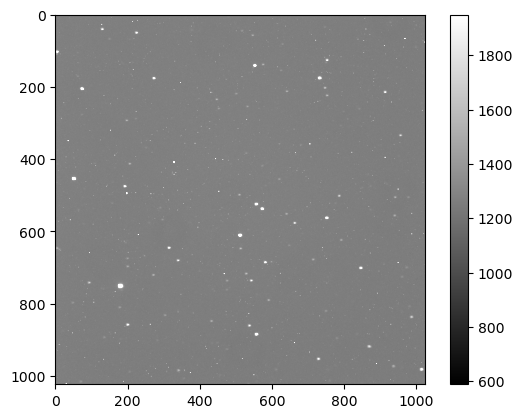

In [52]:
flat_20s = red_20s_data[0].flatten()
flat_mean = np.mean(flat_20s)
flat_std = stats.tstd(flat_20s)
plt.imshow(red_20s_data[0], cmap='gray', vmin = flat_mean-3*flat_std, vmax=flat_mean+3*flat_std)
plt.colorbar()

[]


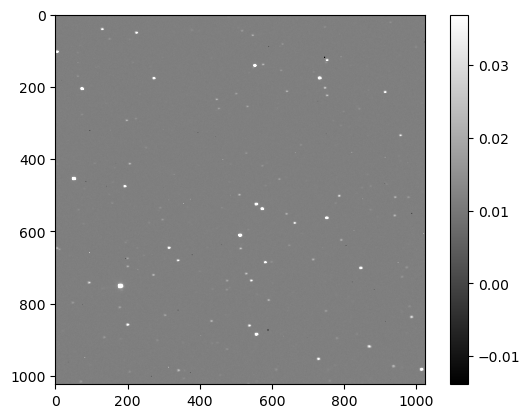

In [58]:
final_red_20s_data = []
final_red_30s_data = []
print(final_red_20s_data)
for i in range(0, len(red_20s_data)):
    final_red_20s_data.append((red_20s_data[i]-median_dark_20s_values) / median_flat_red_values)
for i in range(0, len(red_30s_data)):
    final_red_30s_data.append((red_30s_data[i]-median_dark_30s_values) / median_flat_red_values)

flatten_red = final_red_20s_data[0].flatten()

mean_red = np.mean(flatten_red)
std_red = stats.tstd(flatten_red)
plt.imshow(final_red_20s_data[0], cmap = 'gray', vmin = mean_red-3*std_red, vmax=mean_red+3*std_red)
plt.colorbar()

In [70]:
import os

if cwd[-21:] != "calibrated_fits_files":
    os.chdir("/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2/calibrated_fits_files")
print(cwd)
if os.path.exists("calib_red_20s.000.FIT") != True:
    for i in range(0, len(final_red_20s_data)):
        red_20s_prefix = "calib_red_20s."
        red_20s_suffix = ".FIT"
        if i < 10:
            hdu = fits.PrimaryHDU(final_red_20s_data[i])
            filename = red_20s_prefix + "00" + str(i) + red_20s_suffix
            hdu.writeto(filename, overwrite=True)
        elif i<100:
            hdu = fits.PrimaryHDU(final_red_20s_data[i])
            filename = red_20s_prefix + "0" + str(i) + red_20s_suffix
            hdu.writeto(filename, overwrite=True)
        else:
            hdu = fits.PrimaryHDU(final_red_20s_data[i])
            filename = red_20s_prefix + str(i) + red_20s_suffix
            hdu.writeto(filename, overwrite=True)

if os.path.exists("calib_red_30s.000.FIT") != True:
    for i in range(0, len(red_30s_data)):
        red_30s_prefix = "calib_red_30s."
        red_30s_suffix = ".FIT"
        if i < 10:
            hdu = fits.PrimaryHDU(final_red_30s_data[i])
            filename = red_30s_prefix + "00" + str(i) + red_30s_suffix
            hdu.writeto(filename, overwrite=True)
        elif i<100:
            hdu = fits.PrimaryHDU(final_red_30s_data[i])
            filename = red_30s_prefix + "0" + str(i) + red_30s_suffix
            hdu.writeto(filename, overwrite=True)
        else:
            hdu = fits.PrimaryHDU(final_red_30s_data[i])
            filename = red_30s_prefix + str(i) + red_30s_suffix
            hdu.writeto(filename, overwrite=True)

/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2/calibrated_fits_files


/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2/calibrated_fits_files


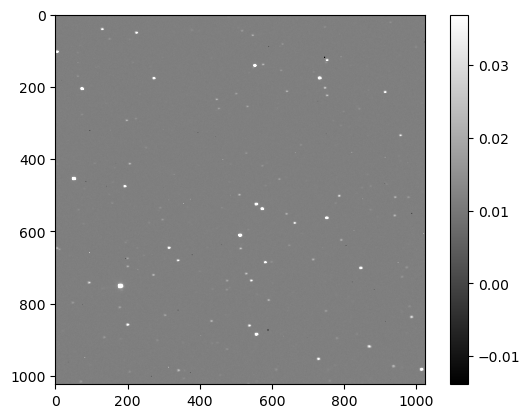

In [69]:
print(cwd)
with fits.open('calib_red_20s.000.FIT') as hdul:
    data = hdul[0].data
flat_data = data.flatten()
mean_data = np.mean(flat_data)
std_data = stats.tstd(flat_data)

plt.imshow(data, cmap='gray', vmin = mean_data - 3*std_data, vmax = mean_data + 3*std_data)
plt.colorbar()